# Practical session 2 - Practise with classic libraries

Students (pair):
- [Mathis Guckert]([link](https://github.com/MGuckert))
- [Gabriele Gardois]([link](https://github.com/ggardo))

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [9]:
import numpy as np
#We denote by rn_seed the fixed value of random seed
rn_seed = 383948462662799 #We choose a random integer
#We check that the seed is correctly working (the generated floats should be equal)
rng1 = np.random.default_rng(rn_seed)
rng2 = np.random.default_rng(rn_seed)

print(rng1.random(), rng2.random())


0.9786484002025315 0.9786484002025315


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

To generate the samples, we use the generator rng1 defined before (associated wth our seed) and the gamma function from numpy.random.

In [10]:
#Computation of the samples
samples = rng1.gamma(shape=9, scale=1/2, size=10**5)

#Save of the samples in a .npy file
np.save('samples.npy', samples)


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

After manually testing several values of bins (from 100 to 500), we chose the value of 120, as it seems the best tradeoff between readability and precision.

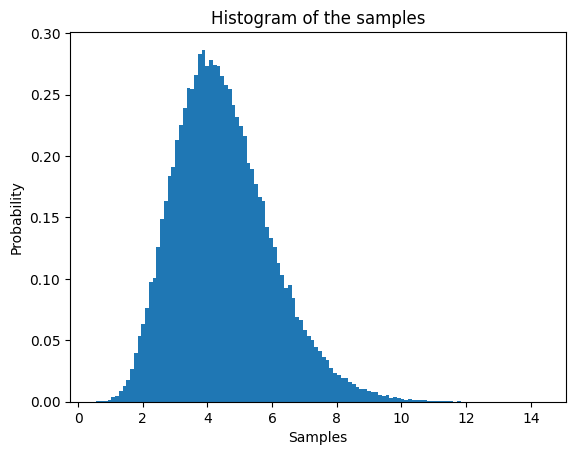

In [11]:
import matplotlib.pyplot as plt
plt.hist(samples, bins=120, density=True)
plt.title('Histogram of the samples')
plt.xlabel('Samples')
plt.ylabel('Probability')
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

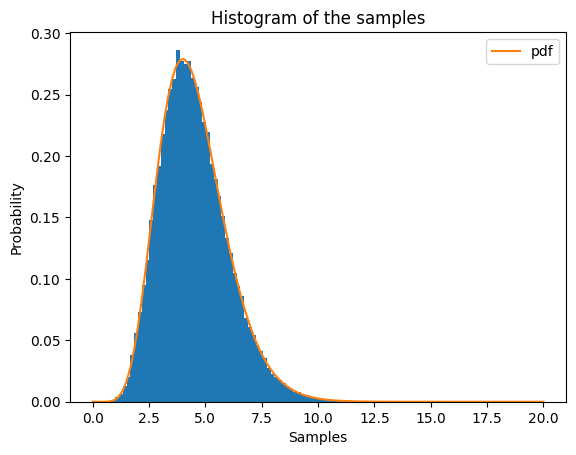

In [12]:
from scipy.stats import gamma

bins = np.linspace(0, 20, 120)

#Computation of the probability density function
pdf = gamma.pdf(bins, 9, scale=1/2)

#Plot of the histogram and the pdf
plt.hist(samples, bins=bins, density=True)
plt.plot(bins, pdf, label='pdf') #Probability density function evaluated on the bins
plt.title('Histogram of the samples')
plt.xlabel('Samples')
plt.ylabel('Probability')
plt.legend()
plt.show()

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [13]:
import pandas as pd
df = pd.read_csv('data/data.csv')

#Sort the DataFrame with respect to the value of X
df = df.sort_values(by=['X'])
display(df)

,X,Y
4,56,37
6,68,34
7,98,25
8,110,36
1,128,28
2,180,24
10,181,20
0,190,24
5,192,22
9,197,24


In [14]:
#Compute the median of X and Y
median_X = df['X'].median()
median_Y = df['Y'].median()
print('Median of X: ', median_X, '\nMedian of Y: ', median_Y)

#Compute the mean of X and Y
mean_X = df['X'].mean()
mean_Y = df['Y'].mean()
print('Mean of X: ', mean_X, '\nMean of Y: ', mean_Y)

#Compute the variance of X and Y
var_X = df['X'].var()
var_Y = df['Y'].var()
print('Variance of X: ', var_X, '\nVariance of Y: ', var_Y)

#Compute the standard deviation of X and Y
std_X = df['X'].std()
std_Y = df['Y'].std()
print('Standard deviation of X: ', std_X, '\nStandard deviation of Y: ', std_Y)

Median of X:  180.5 
Median of Y:  24.0
Mean of X:  153.75 
Mean of Y:  25.916666666666668
Variance of X:  3486.0227272727275 
Variance of Y:  42.446969696969695
Standard deviation of X:  59.04255014201815 
Standard deviation of Y:  6.5151338970868204


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

To compute the regression line, we use the polyfit function from numpy, with the degree of the polynomial equal to 1 (since it's a linear regression).

In [15]:
coeffs = np.polyfit(df['X'], df['Y'], deg=1)
print(coeffs)

[-0.09816475 41.0094968 ]


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

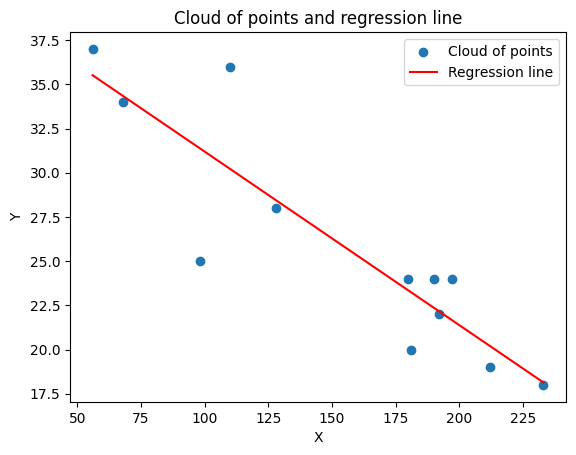

In [16]:
plt.scatter(df['X'], df['Y'], label='Cloud of points') 
plt.plot(df['X'], np.polyval(coeffs, df['X']), label='Regression line', color='red') #Plot of the regression line (evaluating Y=aX + b with the numpy.polyval function).
plt.title('Cloud of points and regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [17]:
def gradient2D(X):
    """
    Computes the 2D discrete gradient operator D applied to a matrix X.
    
    Parameters
    ----------
    X : array_like
        Input array.
        
    Returns
    -------
    X_h : array_like
        Horizontal differences of X.
    X_v : array_like
        Vertical differences of X.
        
    Raises
    ------
    AssertionError
        If the input array has more than 2 dimensions.
    """
    assert X.ndim < 3, "Error: the input array has more than 2 dimensions"
    X_h = np.c_[np.diff(X, axis=1), np.zeros(X.shape[0])] #Horizontal differences
    X_v = np.r_[np.diff(X, axis=0), np.zeros((1, X.shape[1]))] #Vertical differences
    return X_h, X_v

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [18]:
def gradient2DTest():
    #Constant square matrix
    C = np.full((10,10),8) 
    gradC = gradient2D(C)
    assert gradC[0].shape == C.shape and gradC[1].shape == C.shape, "Error: the output of gradient2D is incorrect (constant square matrix case)"
    
    #The gradient of a constant matrix being 0, we use the .all method to compare the theoretical result and the gradient2D one.
    assert (gradC == np.zeros((C.shape[0],C.shape[1]))).all(), "Error: incorrect result (constant square matrix)"
    
    #Constant non-square input matrix
    D = np.full((5,10),8)
    gradD = gradient2D(D)
    assert gradD[0].shape == D.shape and gradD[1].shape == D.shape, "Error: the output of gradient2D is incorrect (constant non-square matrix case)"
    
    assert (gradD == np.zeros((D.shape[0],D.shape[1]))).all(), "Error: incorrect result (constant non-square matrix)"
    #TODO add a matrix non constant and compute by hand the resultTODO add a matrix non constant and compute by hand the result
gradient2DTest()

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

Cf. gradient2D function up above.

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [19]:
def tv(X):
    """
    Computes the discrete isotropic total variation of an input matrix X.
    
    Parameters
    ----------
    X : array_like
        Input array.
        
    Returns
    -------
    tv : float
        Discrete isotropic total variation of X.
    """
    X_h, X_v = gradient2D(X)
    tv = np.sum(np.sqrt(X_h**2 + X_v**2))
    return tv

In [20]:
def tvTest():
    #Constant square matrix
    C = np.full((10,10),8) 
    assert tv(C) == 0, "Error: incorrect result (constant square matrix)"
    
    #Constant non-square input matrix
    D = np.full((5,10),8)
    assert tv(D) == 0, "Error: incorrect result (constant non-square matrix)"
    #TODO add a matrix non constant and compute by hand the result
tvTest()

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [21]:
def gradient2D_adjoint(Y_h,Y_v):
    YhDh = np.c_[-Y_h[:,0], -np.diff(Y_h, axis=1), -Y_h[:,-1]] #Horizontal differences (same implementation as gradient2D)
    DvYv = np.r_[-np.reshape(Y_v[0],newshape=[1,-1]), -np.diff(Y_v, axis=0), -np.reshape(Y_v[-1],newshape=[1,-1])].T #Vertical differences 
    return YhDh + DvYv

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).
> `np.conj` is useful.

**Answer**:

In [22]:
def computeInnerProduct(A,B) :
    C=0
    n, m = A.shape
    for i in range(n) :
        for j in range(m) :
            C += np.conj(A[i,j])*B[i,j]
    return C

def gradient2D_adjointTest():
    #Random matrices
    rng = np.random.default_rng(rn_seed) #We initialize a generator with the seed used in Exercise 1
    X = np.array(rng.random((10,10)))
    Y_h = np.array(rng.random((10,10)))
    Y_v = np.array(rng.random((10,10)))
    
    #Scalar products
    DX = gradient2D(X) #D(X)
    AdDX = gradient2D_adjoint(Y_h,Y_v) #D*(Y)
    SP1 = computeInnerProduct(DX[0],Y_h) + computeInnerProduct(DX[1],Y_v) #<D(X),Y>
    SP2 = computeInnerProduct(X,AdDX) #<X,D*(Y)>
    print(SP1,SP2)
    assert SP1 == SP2, "Error: incorrect result"

gradient2D_adjointTest()

2.011778117595545 -5.811766114031243


AssertionError: Error: incorrect result

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [ ]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
